JMJPFU

Lord bless this attempt of yours
24-March-2020
#### Scrapping text from pdf and word documents

Reference

https://www.geeksforgeeks.org/python-reading-contents-of-pdf-using-ocr-optical-character-recognition/

In [2]:
!pip install pdf2image
!pip install pytesseract

Processing /home/acer/.cache/pip/wheels/0f/80/3a/fac1dc0f7dbe12c805b9dc6497f325f0e9f9cedbec3ab0185b/pdf2image-1.12.1-cp37-none-any.whl
Processing /home/acer/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241/pytesseract-0.3.3-py2.py3-none-any.whl


In [31]:
!pip install nltk

     |████████████████████████████████| 1.5MB 1.4MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449906 sha256=2fb0541e1b4f729ba51715f64a5c77a256f8fbc12f2c229a25ba48a383503b1a
  Stored in directory: /home/acer/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [3]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os 

In [4]:
# Path of the pdf 
PDF_file = "/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/122579Ashish_Malhotra.pdf"

In [5]:
pages = convert_from_path(PDF_file, 500) 
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4135x5847 at 0x7FE61D7AF710>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4135x5847 at 0x7FE61E426610>]

In [6]:
# Counter to store images of each page of PDF to image 
image_counter = 1

In [18]:
# Iterate through all the pages stored above 
for page in pages: 
  
    # Declaring filename for each page of PDF as JPG 
    # For each page, filename will be: 
    # PDF page 1 -> page_1.jpg 
    # PDF page 2 -> page_2.jpg 
    # PDF page 3 -> page_3.jpg 
    # .... 
    # PDF page n -> page_n.jpg 
    page
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

In [13]:
filename = "page_"+str(image_counter)+".jpg"
filename

'page_3.jpg'

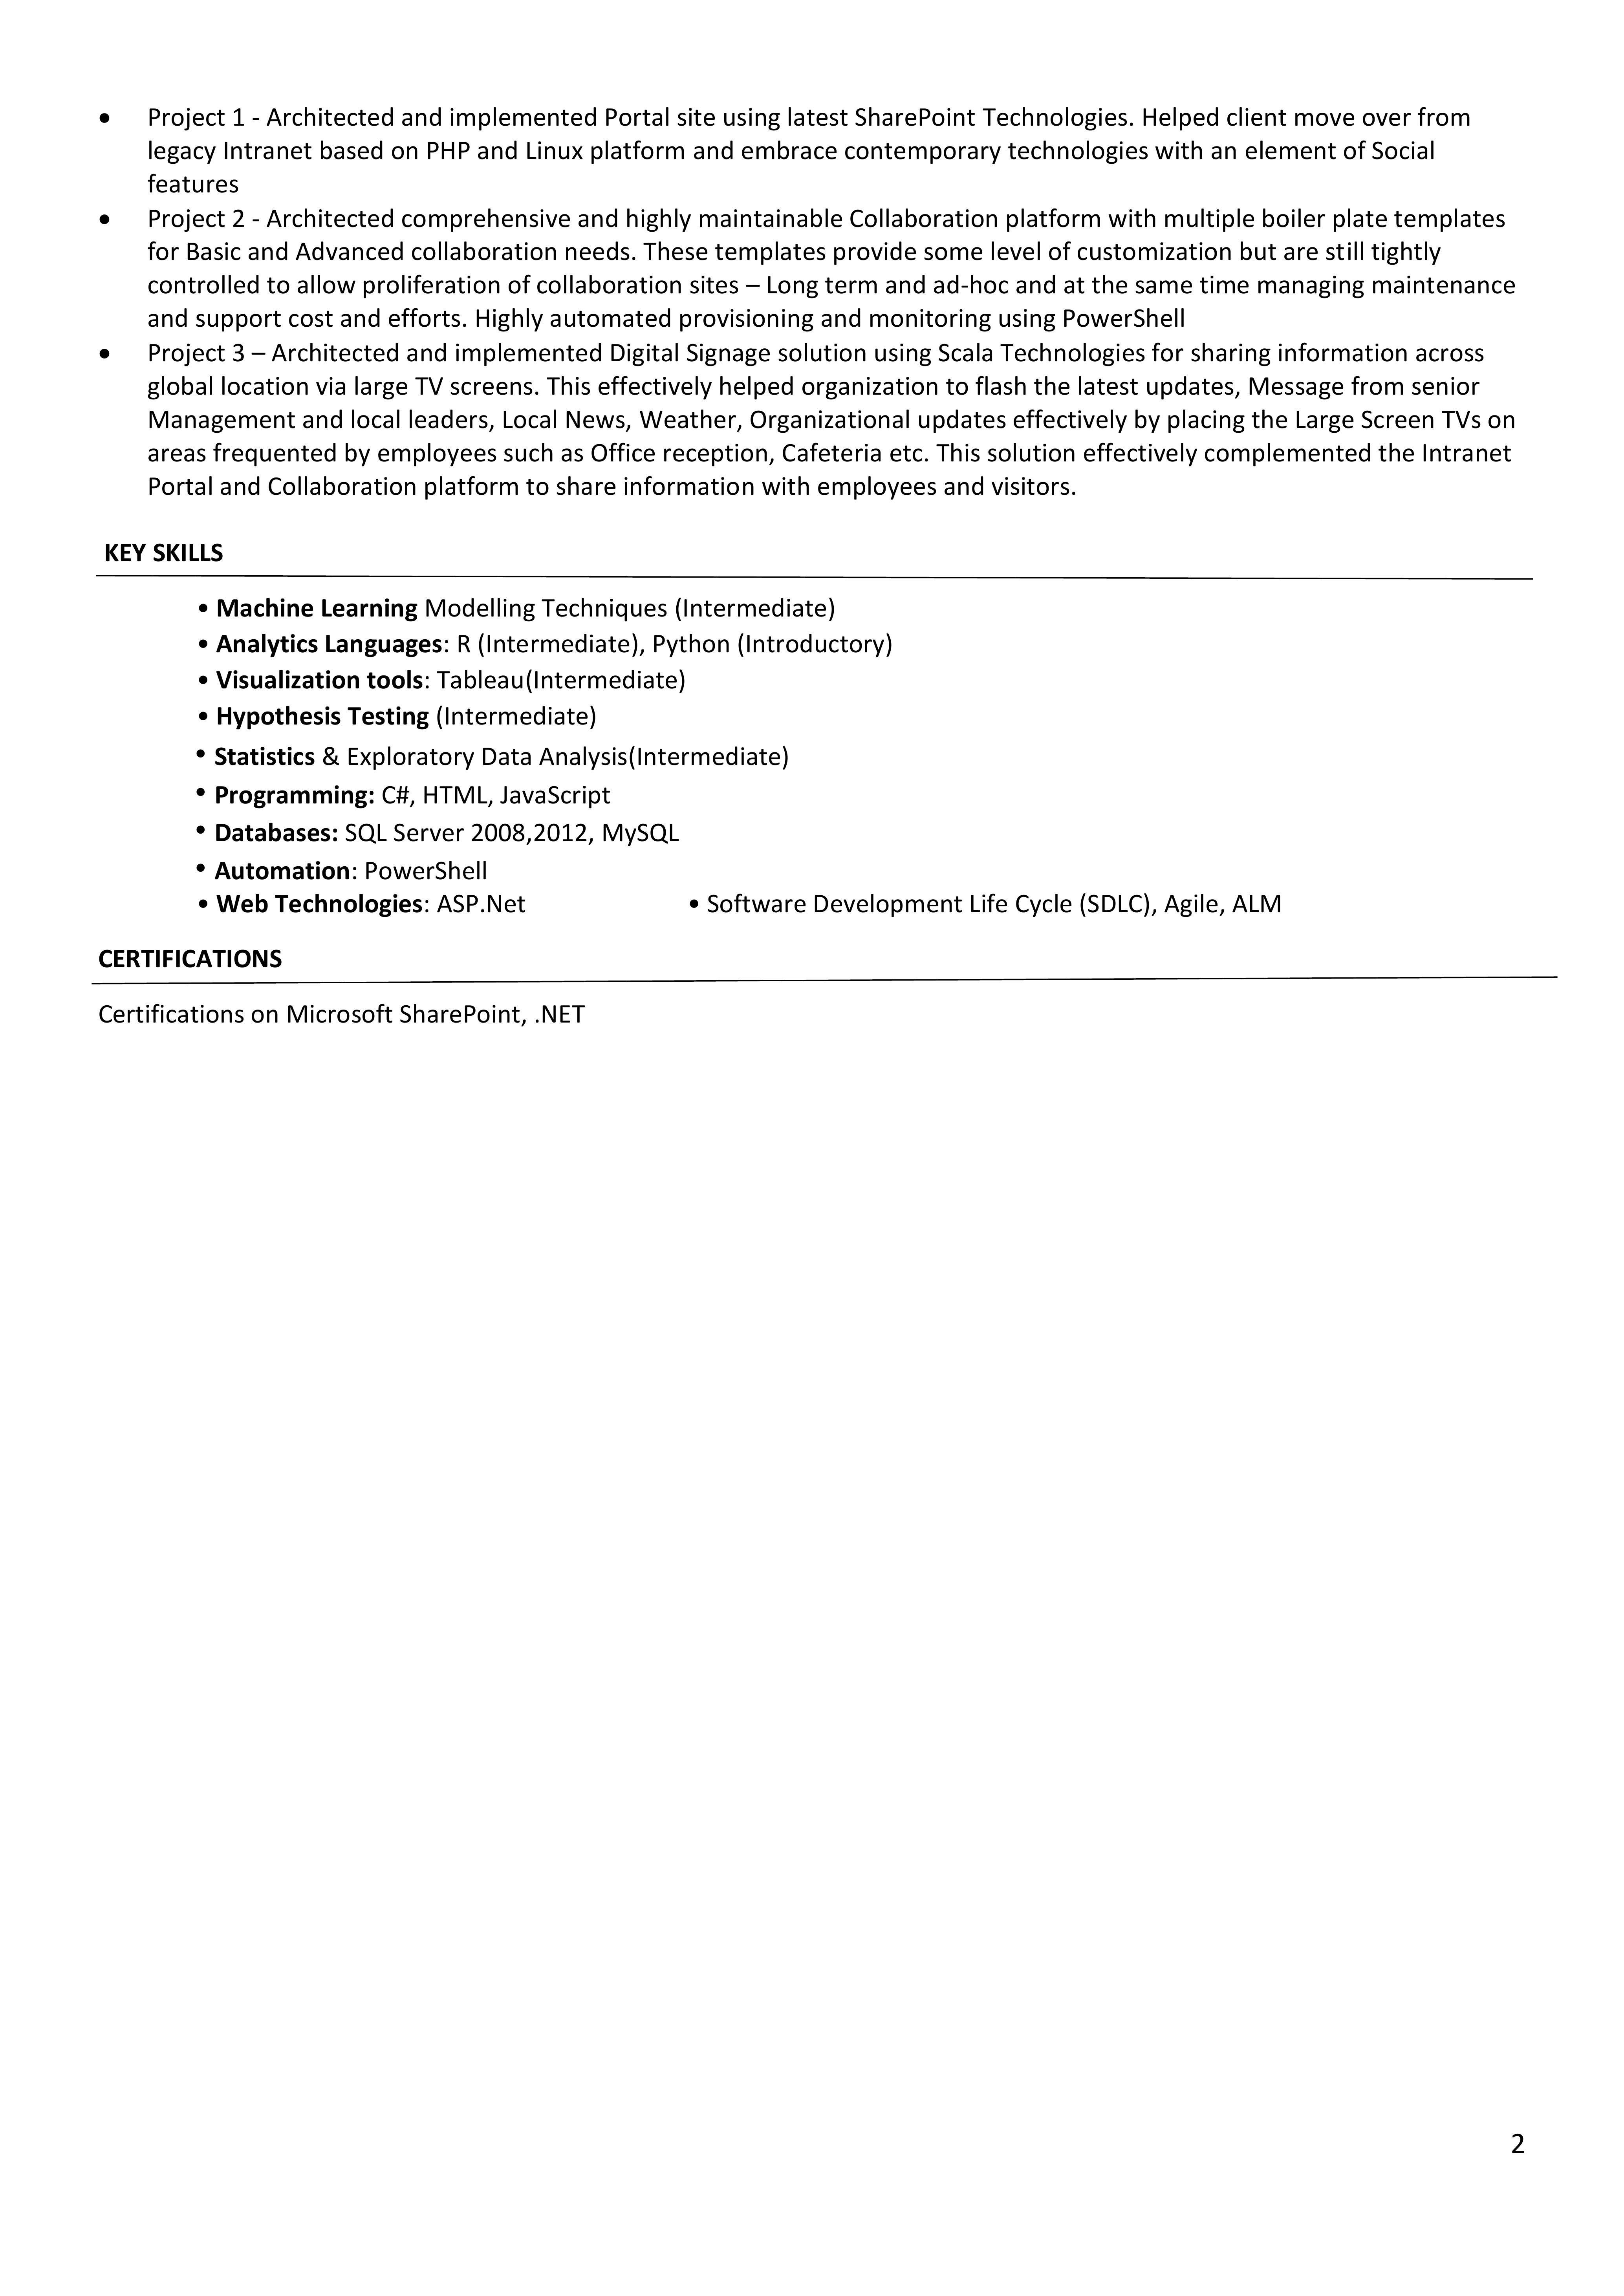

In [19]:
page

In [25]:
text = str(((pytesseract.image_to_string(page))))
text1 = text.split('.')

In [32]:
text1

['e Project 1 - Architected and implemented Portal site using latest SharePoint Technologies',
 ' Helped client move over from\nlegacy Intranet based on PHP and Linux platform and embrace contemporary technologies with an element of Social\nfeatures\n\ne Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templates\nfor Basic and Advanced collaboration needs',
 ' These templates provide some level of customization but are still tightly\ncontrolled to allow proliferation of collaboration sites — Long term and ad-hoc and at the same time managing maintenance\nand support cost and efforts',
 ' Highly automated provisioning and monitoring using PowerShell\n\ne Project 3 —Architected and implemented Digital Signage solution using Scala Technologies for sharing information across\nglobal location via large TV screens',
 ' This effectively helped organization to flash the latest updates, Message from senior\nManagement and local lead

In [38]:
text1[1].split('.')

[' Helped client move over from\nlegacy Intranet based on PHP and Linux platform and embrace contemporary technologies with an element of Social\nfeatures\n\ne Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templates\nfor Basic and Advanced collaboration needs']

In [9]:
#Part #2 - Recognizing text from the images using OCR 
    
# Variable to get count of total number of pages 
filelimit = image_counter-1
  
# Creating a text file to write the output 
outfile = "out_text.txt"
  
# Open the file in append mode so that  
# All contents of all images are added to the same file 
f = open(outfile, "a") 

# Iterate from 1 to total number of pages 
for i in range(1, filelimit + 1): 
  
    # Set filename to recognize text from 
    # Again, these files will be: 
    # page_1.jpg 
    # page_2.jpg 
    # .... 
    # page_n.jpg 
    filename = "page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesserct 
    text = str(((pytesseract.image_to_string(Image.open(filename))))) 
  
    # The recognized text is stored in variable text 
    # Any string processing may be applied on text 
    # Here, basic formatting has been done: 
    # In many PDFs, at line ending, if a word can't 
    # be written fully, a 'hyphen' is added. 
    # The rest of the word is written in the next line 
    # Eg: This is a sample text this word here GeeksF- 
    # orGeeks is half on first line, remaining on next. 
    # To remove this, we replace every '-\n' to ''. 
    #text = text.replace('-\n', '')     
  
    # Finally, write the processed text to the file. 
    f.write(text) 
  
# Close the file after writing all the text. 
f.close() 

In [10]:
text

'e Project 1 - Architected and implemented Portal site using latest SharePoint Technologies. Helped client move over from\nlegacy Intranet based on PHP and Linux platform and embrace contemporary technologies with an element of Social\nfeatures\n\ne Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templates\nfor Basic and Advanced collaboration needs. These templates provide some level of customization but are still tightly\ncontrolled to allow proliferation of collaboration sites — Long term and ad-hoc and at the same time managing maintenance\nand support cost and efforts. Highly automated provisioning and monitoring using PowerShell\n\ne Project 3 —Architected and implemented Digital Signage solution using Scala Technologies for sharing information across\nglobal location via large TV screens. This effectively helped organization to flash the latest updates, Message from senior\nManagement and local leaders, Local News, 

In [12]:
file1 = open("out_text.txt","r+")  
resText = file1.readlines() 
resText

['Ashish Malhotra\n',
 '+1 5108097665; ashish42@gmail.com; Minneapolis\n',
 '\n',
 'PROFILE SUMMARY\n',
 '\n',
 ' \n',
 '\n',
 'e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep\n',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure.\n',
 '\n',
 'e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology\n',
 'experience across domains and Data Science and Analytics skills acquired.\n',
 '\n',
 'e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients\n',
 'based out of India and USA.\n',
 '\n',
 'ACADEMIC CREDENTIALS\n',
 '\n',
 ' \n',
 '\n',
 'e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017\n',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of\n',
 'academic learning 

In [42]:
# Reading the file

file1 = open("out_text.txt","r+")  
resText = file1.readlines() 

file1.close()  


In [43]:
resText

['Ashish Malhotra\n',
 '+1 5108097665; ashish42@gmail.com; Minneapolis\n',
 '\n',
 'PROFILE SUMMARY\n',
 '\n',
 ' \n',
 '\n',
 'e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep\n',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure.\n',
 '\n',
 'e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology\n',
 'experience across domains and Data Science and Analytics skills acquired.\n',
 '\n',
 'e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients\n',
 'based out of India and USA.\n',
 '\n',
 'ACADEMIC CREDENTIALS\n',
 '\n',
 ' \n',
 '\n',
 'e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017\n',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of\n',
 'academic learning 

In [18]:
resText[0].splitlines()

['Ashish Malhotra']

In [27]:
resDetails = []
for j in range(0,len(resText)):
    resDetails.append(resText[j].split('\n'))

In [28]:
resDetails

[['Ashish Malhotra', ''],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis', ''],
 ['', ''],
 ['PROFILE SUMMARY', ''],
 ['', ''],
 [' ', ''],
 ['', ''],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep',
  ''],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.', ''],
 ['', ''],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology',
  ''],
 ['experience across domains and Data Science and Analytics skills acquired.',
  ''],
 ['', ''],
 ['e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients',
  ''],
 ['based out of India and USA.', ''],
 ['', ''],
 ['ACADEMIC CREDENTIALS', ''],
 ['', ''],
 [' ', ''],
 ['', ''],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017',
  ''],
 ['A comprehensive 11-month program taught by Indust

In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize



[nltk_data] Downloading package punkt to /home/acer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
resDetails2 = []
for j in range(0,len(resText)):
    resDetails2.append(sent_tokenize(resText[j]))
resDetails2

[['Ashish Malhotra'],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis'],
 [],
 ['PROFILE SUMMARY'],
 [],
 [],
 [],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc.',
  'Deep'],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.'],
 [],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology'],
 ['experience across domains and Data Science and Analytics skills acquired.'],
 [],
 ['e Working as Senior Technology Architect with Infosys since 2006.',
  'Successfully delivered multiple projects across clients'],
 ['based out of India and USA.'],
 [],
 ['ACADEMIC CREDENTIALS'],
 [],
 [],
 [],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017'],
 ['A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of'],
 ['academic learning & 30+ hours

In [49]:
list2 = [e for e in resDetails2 if e]

In [50]:
list2

[['Ashish Malhotra'],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis'],
 ['PROFILE SUMMARY'],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc.',
  'Deep'],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.'],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology'],
 ['experience across domains and Data Science and Analytics skills acquired.'],
 ['e Working as Senior Technology Architect with Infosys since 2006.',
  'Successfully delivered multiple projects across clients'],
 ['based out of India and USA.'],
 ['ACADEMIC CREDENTIALS'],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017'],
 ['A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of'],
 ['academic learning & 30+ hours of industry mentoring'],
 ['Master of Information

In [66]:
list2[5]

['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology']

### Using PYPDF2

In [51]:
!pip install pypdf2

     |████████████████████████████████| 81kB 1.8MB/s eta 0:00:01
  Created wheel for pypdf2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61086 sha256=1a19d05c959acb2550b99ce1393fd171772e237eab305d53df085b587a963cea
  Stored in directory: /home/acer/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pypdf2


In [52]:
import PyPDF2
pdfFileObj = open(PDF_file, 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages
 

2

In [54]:
pageObj = pdfReader.getPage(0)


In [56]:
resText2 = pageObj.extractText()

In [61]:
resText2

'1\n \n \nAshish Malhotra\n \n+1 5108097665\n;\n \nashish42@gmail.com\n; Minneapolis\n \n \nPROFILE SUMMARY\n \n\n \nSeasoned \nIT \nprofessional with 19 years of \nexperience\n, \nupskilled in Data Science \n\n \nR, Excel, Tableau\n, Statistics etc\n. Deep \nskills in SQL, Microsoft SharePoint, Office 365 and Azure\n.\n \n\n \nLooking for a meaningful transition to full time \nDigital Transformation Solution Expert\n \nby \nleverag\ning \nexi\ns\nting technology \nexperience across domains\n \nand Data Science and Analytics skills acquired\n.\n \n\n \nW\norking as Senior Technology Architect with Infosys\n \nsince 2006\n.\n \nSuccessfully delivered multiple projects across clients \nbased out of India and USA.\n \n \nACADEMIC CREDENTIALS\n \n\n \nPG Diploma \nin Data Analytics\n \nI IIIT\n-\nBangalore & UpGrad   I  \nCGPA\n \n3.\n5\n \n/ 4\n \n \n \n \n            \nSince \nSep\n \n201\n7\n \nA comprehensive 11\n-\nmonth program taught by Industry experts and IIITB faculty; 7 case stu

In [60]:
resText2.splitlines()

['1',
 ' ',
 ' ',
 'Ashish Malhotra',
 ' ',
 '+1 5108097665',
 ';',
 ' ',
 'ashish42@gmail.com',
 '; Minneapolis',
 ' ',
 ' ',
 'PROFILE SUMMARY',
 ' ',
 '',
 ' ',
 'Seasoned ',
 'IT ',
 'professional with 19 years of ',
 'experience',
 ', ',
 'upskilled in Data Science ',
 '',
 ' ',
 'R, Excel, Tableau',
 ', Statistics etc',
 '. Deep ',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure',
 '.',
 ' ',
 '',
 ' ',
 'Looking for a meaningful transition to full time ',
 'Digital Transformation Solution Expert',
 ' ',
 'by ',
 'leverag',
 'ing ',
 'exi',
 's',
 'ting technology ',
 'experience across domains',
 ' ',
 'and Data Science and Analytics skills acquired',
 '.',
 ' ',
 '',
 ' ',
 'W',
 'orking as Senior Technology Architect with Infosys',
 ' ',
 'since 2006',
 '.',
 ' ',
 'Successfully delivered multiple projects across clients ',
 'based out of India and USA.',
 ' ',
 ' ',
 'ACADEMIC CREDENTIALS',
 ' ',
 '',
 ' ',
 'PG Diploma ',
 'in Data Analytics',
 ' ',
 'I IIIT',
 '